
#	Correcting Data Classification and creating a good database
#	AUTHOR: 乔昂 - jueta
#	DATE: 13/12/2022


In [3]:
import pandas as pd
import json
  

df = pd.read_feather("Data/map4.feather")

In [4]:
df.head()

,name,colormap,data [nA],flow rate [m3/s],voltage,current PS,temperature,humidity,date and time,target voltage,mean,variance,deviation,median,rms,spray mode
0,setup/liquid/ethanol,black,"[244.52830505371094, 244.2767333984375, 235.47...",0.01,4001.61,-2.426e-08,0,32.00\r\n,Thu_26 Jan 2023,4000,119.757347,2970.955811,54.506474,107.169815,131.578033,[Undefined]
1,setup/liquid/ethanol,black,"[29.182390213012695, 26.666667938232422, 24.90...",0.01,4001.61,-2.426e-08,22.10\r\n,32.00\r\n,Thu_26 Jan 2023,4000,14.447593,44.592587,6.677768,13.836478,15.916203,[Undefined]
2,setup/liquid/ethanol,blue,"[5.534591197967529, 3.2704403400421143, 5.5345...",0.01,4051.34,4.19793e-08,22.10\r\n,32.00\r\n,Thu_26 Jan 2023,4050,1.904478,14.250817,3.775025,2.012578,4.228221,[Intermittent]
3,setup/liquid/ethanol,green,"[1.5094339847564697, -1.7610063552856445, 5.78...",0.01,4051.34,4.19793e-08,22.10\r\n,32.00\r\n,Thu_26 Jan 2023,4050,0.934083,14.046763,3.747901,1.006289,3.862548,[Dripping]
4,setup/liquid/ethanol,green,"[0.0, 6.5408806800842285, 8.553459167480469, 2...",0.01,4101.44,4.06702e-08,22.10\r\n,32.00\r\n,Thu_26 Jan 2023,4100,1.061293,14.228571,3.772078,1.006289,3.918535,[Dripping]


In [5]:
'''
	Analysis of mapping V x FR experiments
	AUTHOR: 乔昂 - jueta
	DATE: 19/01/2023
'''

import pandas as pd
from pandas.io.json import json_normalize
import json
import matplotlib.pyplot as plt
from sklearn.utils import column_or_1d
import numpy as np
from scipy.signal import butter, lfilter



In [4]:


colormap = []
for electro_class in df['spray mode']:
    if electro_class == 'Intermittent':
        colormap.append('blue')
    elif electro_class == 'Cone Jet':
        colormap.append('red')
    elif electro_class == 'Dripping':
        colormap.append('green')
    elif electro_class == 'Multi Jet':
        colormap.append('purple')
    elif electro_class == 'Corona':
        colormap.append('cyan')
    elif electro_class == 'Undefined':
        colormap.append('black')
    else:
        colormap.append('black')


df.insert(1, 'colormap', colormap)


In [6]:

print(df.info())
print(df.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3263 non-null   object 
 1   colormap          3263 non-null   object 
 2   data [nA]         3263 non-null   object 
 3   flow rate [m3/s]  3263 non-null   object 
 4   voltage           3263 non-null   object 
 5   current PS        3263 non-null   object 
 6   temperature       3263 non-null   object 
 7   humidity          3263 non-null   object 
 8   date and time     3263 non-null   object 
 9   target voltage    3263 non-null   int64  
 10  mean              3263 non-null   float64
 11  variance          3263 non-null   float64
 12  deviation         3263 non-null   float64
 13  median            3263 non-null   float64
 14  rms               3263 non-null   float64
 15  spray mode        3263 non-null   object 
dtypes: float64(5), int64(1), object(10)
memory

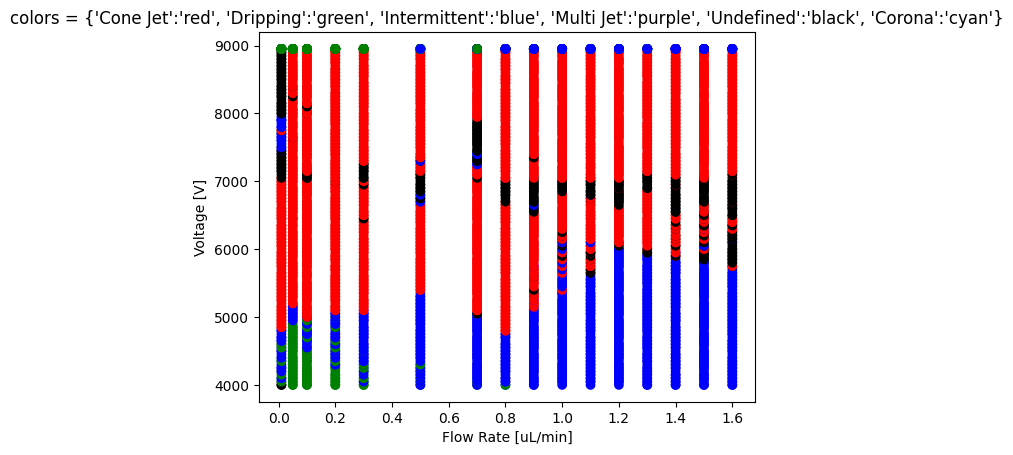

In [8]:


df['flow rate [m3/s]'] = df['flow rate [m3/s]'].astype(float)
plt.scatter(df['flow rate [m3/s]'], df['target voltage'], color=df['colormap'])
plt.ylabel('Voltage [V]')
plt.xlabel('Flow Rate [uL/min]')
plt.title("colors = {'Cone Jet':'red', 'Dripping':'green', 'Intermittent':'blue', 'Multi Jet':'purple', 'Undefined':'black', 'Corona':'cyan'}")
plt.show()


### Playing with Neural Networks in mapping

In [36]:
x1 = df['flow rate [m3/s]']
x2 = df['voltage']
y = df['colormap']

data_out = pd.concat([x1, x2, y], axis=1).rename(columns={'flow rate [m3/s]':'x1', 'voltage':'x2', 'colormap':'y'})


yout = []
for electro_class in data_out['y']:
    if electro_class == 'red':
        yout.append(1)
    else:
        yout.append(0)


data_out.insert(2, 'yout', yout)
data_out = data_out.drop(columns=['y'])

print(data_out)

nump = data_out.to_numpy()

print(nump)



data_out.to_csv('testing.csv')

        x1       x2  yout
0     0.01  4001.61     0
1     0.01  4001.61     0
2     0.01  4051.34     0
3     0.01  4051.34     0
4     0.01  4101.44     0
...    ...      ...   ...
3258  1.60  8951.23     0
3259  1.60  8951.23     0
3260  1.60  8951.23     0
3261  1.60  8951.23     0
3262  1.60  8951.23     0

[3263 rows x 3 columns]
[[0.01 '4001.61' 0]
 [0.01 '4001.61' 0]
 [0.01 '4051.34' 0]
 ...
 [1.6 '8951.23' 0]
 [1.6 '8951.23' 0]
 [1.6 '8951.23' 0]]


In [ ]:
from sklearn.datasets import make_circles, make_moons, make_blobs
from matplotlib import pyplot
from pandas import DataFrame
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack

alphas = np.logspace(-1, 1, 5)

classifiers = []
names = []
for alpha in alphas:
    classifiers.append(
        make_pipeline(
            StandardScaler(),
            MLPClassifier(
                solver="lbfgs",
                alpha=alpha,
                random_state=1,
                max_iter=2000,
                early_stopping=True,
                hidden_layer_sizes=[10, 10],
            ),
        )
    )
    names.append(f"alpha {alpha:.2f}")


X, y = testing1
print(X, y)
# define bounds of the domain
min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
# define the x and y scale
x1grid = arange(min1, max1, 0.1)
x2grid = arange(min2, max2, 0.1)
# create all of the lines and rows of the grid
xx, yy = meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
# horizontal stack vectors to create x1,x2 input for the model
grid = hstack((r1,r2))

df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
# Plot the training points
ax = plt.subplot(1,1,1)
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

clf.fit(X, y)

if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.column_stack([xx.ravel(), yy.ravel()]))
else:
    Z = clf.predict_proba(np.column_stack([xx.ravel(), yy.ravel()]))[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

# Plot also the training points
ax.scatter(
    X_train[:, 0],
    X_train[:, 1],
    c=y_train,
    cmap=cm_bright,
    edgecolors="black",
    s=25,
)


ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

figure.subplots_adjust(left=0.02, right=0.98)
plt.show()